In [ ]:
import pandas as pd  # Importing pandas library for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib library for data visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # Importing functions for data splitting and grid search
from sklearn.ensemble import RandomForestClassifier  # Importing Random Forest classifier
from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors classifier
from sklearn.neural_network import MLPClassifier  # Importing Multilayer Perceptron classifier
from sklearn.metrics import accuracy_score  # Importing accuracy score for model evaluation


In [ ]:
# Load the drug classification dataset from Kaggle
data = pd.read_csv('/content/drug200.csv')


In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Preprocess the data
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'])



In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('Drug', axis=1)
y = data['Drug']




In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Create a Random Forest classifier for drug classification
rf_classifier = RandomForestClassifier()

# Create a K-Nearest Neighbors classifier for drug classification
knn_classifier = KNeighborsClassifier()

# Create a Multilayer Perceptron classifier for drug classification
mlp_classifier = MLPClassifier()



In [ ]:
# Define the hyperparameter grid for grid search for each classifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}




In [ ]:
# Perform grid search to find the best hyperparameters for each classifier
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid, cv=5)

rf_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train, y_train)
mlp_grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'solver': ['adam', 'sgd']})

In [ ]:
# Get the best hyperparameter values and the corresponding best models
rf_best_params = rf_grid_search.best_params_
knn_best_params = knn_grid_search.best_params_
mlp_best_params = mlp_grid_search.best_params_

rf_best_model = rf_grid_search.best_estimator_
knn_best_model = knn_grid_search.best_estimator_
mlp_best_model = mlp_grid_search.best_estimator_



In [ ]:
# Make predictions on the test set using the best models
rf_y_pred = rf_best_model.predict(X_test)
knn_y_pred = knn_best_model.predict(X_test)
mlp_y_pred = mlp_best_model.predict(X_test)



In [ ]:
# Calculate the accuracy of each drug classification model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)

In [ ]:
# Calculate the accuracy of each drug classification model
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Multilayer Perceptron Accuracy:", mlp_accuracy)

Random Forest Accuracy: 0.87
K-Nearest Neighbors Accuracy: 0.75
Multilayer Perceptron Accuracy: 0.925


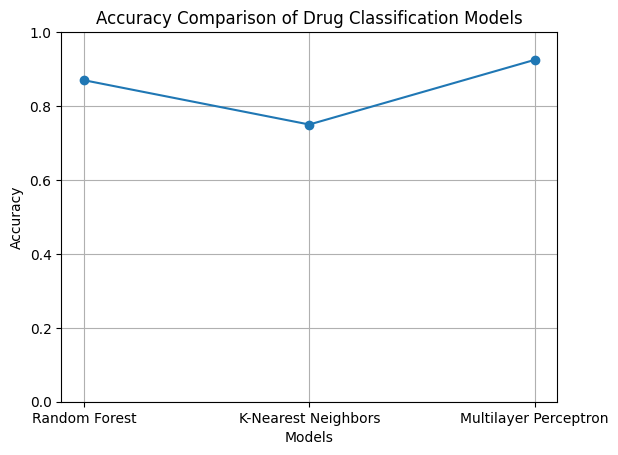

In [ ]:
# Create a line chart to compare the accuracy of the models
models = ['Random Forest', 'K-Nearest Neighbors', 'Multilayer Perceptron']
accuracies = [rf_accuracy, knn_accuracy, mlp_accuracy]

plt.plot(models, accuracies, marker='o')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Drug Classification Models')
plt.ylim([0, 1])
plt.grid(True)
plt.show()